In [1]:
# import preprocessing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('data/continuous.csv')
df.head()

,ACT,SAT Math USE,SAT Reading USE,SAT Total USE,RGPA,Class Rank,Class Size,Class Percentile
0,NaN,NaN,NaN,NaN,2.15,213.0,213.0,0.00
1,NaN,450.0,440.0,890.0,2.52,137.0,138.0,0.01
2,18.0,NaN,NaN,NaN,1.24,65.0,66.0,0.02
3,NaN,NaN,NaN,NaN,1.90,121.0,125.0,0.03
4,NaN,NaN,NaN,NaN,NaN,109.0,113.0,0.04


In [3]:
# count how many missing values each feature in the main dataframe has 
names = []
val = []

for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break
# print out results as (column_name, # of null values in column_name)
print(names, val)

['ACT'] [ACT                 41479
SAT Math USE        30941
SAT Reading USE     30940
SAT Total USE       30941
RGPA                13145
Class Rank          46848
Class Size          46849
Class Percentile    47475
dtype: int64]


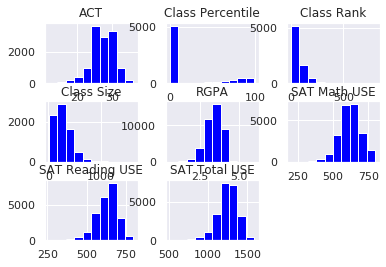

In [4]:
# exmaine the features in the dfcont dataframe 
for col in df.columns:
    #fig = plt.figure(figsize=(50,30))
    df.hist(color='blue')
    break
plt.show()

In [5]:
df.describe()

,ACT,SAT Math USE,SAT Reading USE,SAT Total USE,RGPA,Class Rank,Class Size,Class Percentile
count,12899.000000,23437.000000,23438.000000,23437.000000,41233.000000,7530.00000,7529.000000,6903.000000
mean,27.098302,615.207151,627.147368,1242.360370,3.395161,70.44927,270.219418,20.109756
std,3.435485,78.432632,69.332167,133.321144,0.527110,70.95937,161.465704,33.889749
min,12.000000,200.000000,260.000000,510.000000,0.560000,1.00000,12.000000,0.000000
25%,25.000000,570.000000,590.000000,1170.000000,3.050000,22.00000,153.000000,0.660000
50%,27.000000,620.000000,640.000000,1250.000000,3.440000,50.00000,237.000000,0.860000
75%,30.000000,670.000000,680.000000,1330.000000,3.790000,95.00000,368.000000,34.500000
max,36.000000,800.000000,800.000000,1590.000000,6.020000,805.00000,1617.000000,99.000000


In [6]:
# replace null value
for value in df.columns:
    df.fillna(df.mean(), inplace=True)
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
df.describe()

,ACT,SAT Math USE,SAT Reading USE,SAT Total USE,RGPA,Class Rank,Class Size,Class Percentile
count,54378.000000,54378.000000,54378.000000,54378.000000,54378.000000,54378.000000,54378.000000,54378.000000
mean,27.098302,615.207151,627.147368,1242.360370,3.395161,70.449270,270.219418,20.109756
std,1.673176,51.490951,45.517475,87.525209,0.458998,26.404064,60.077586,12.073918
min,12.000000,200.000000,260.000000,510.000000,0.560000,1.000000,12.000000,0.000000
25%,27.098302,615.207151,627.147368,1242.360370,3.190000,70.449270,270.219418,20.109756
50%,27.098302,615.207151,627.147368,1242.360370,3.395161,70.449270,270.219418,20.109756
75%,27.098302,615.207151,627.147368,1242.360370,3.670000,70.449270,270.219418,20.109756
max,36.000000,800.000000,800.000000,1590.000000,6.020000,805.000000,1617.000000,99.000000


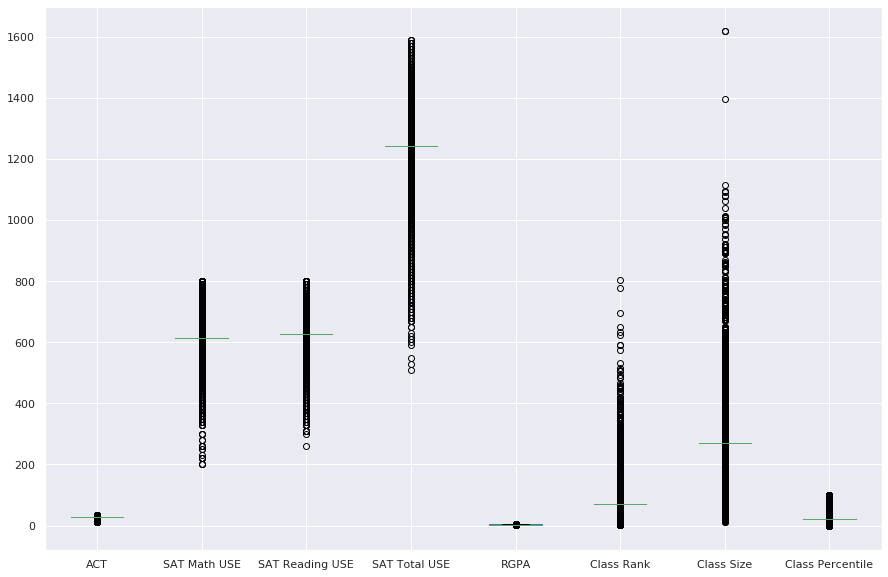

In [8]:
# exmaine the features in the dfcont dataframe 
for col in df.columns:
    fig = plt.figure(figsize=(15,10))
    df.boxplot()
    break
plt.show()

In [13]:
# finding IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ACT                 0.00
SAT Math USE        0.00
SAT Reading USE     0.00
SAT Total USE       0.00
RGPA                0.48
Class Rank          0.00
Class Size          0.00
Class Percentile    0.00
dtype: float64


In [14]:
# define upper bound
upper = Q3 + 1.5 * IQR
# define lower bound 
lower = Q1 - 1.5 * IQR
# define outlier variable 
# below is equivalent to this formula: outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier = (df < lower) | (df > upper)

In [15]:
# define upper and lower lists
upper = []
lower = []

# create for loop that will iterate over each value in every column
for i in df.columns:
    # define Q1 and Q3 for each column
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    # define IQR for each column
    IQR = Q3 - Q1
    # append empty lists upper and lower
    upper_list = Q3 + 1.5 * IQR
    upper.append(upper_list)
    lower_list = Q1 - 1.5 * IQR
    lower.append(lower_list)

In [16]:
# define the function that will replace outlier values in each column with the appropriate upper or lower limit 
def outlier_handling(x, upper, lower):
    if x > upper:
        x = upper
    elif x < lower:
            x = lower
    else:
        pass
    return x

In [17]:
# apply the outlier handling function to the df dataframe to replace the outlier values in each column
for col in df.columns:
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5*IQR
    ubound = q3 + 1.5*IQR
    df.loc[:, col] = df.loc[:, col].apply(lambda x: outlier_handling(x, ubound,lbound))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e729c5588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e729be748>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e729c5dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e729bef98>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e729be128>],
 'means': []}

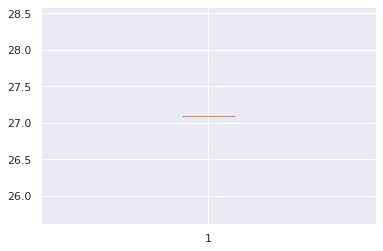

In [18]:
plt.boxplot(df['ACT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e72b172e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e72d9cf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e72b177f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e72d9ca58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e72d9c4a8>],
 'means': []}

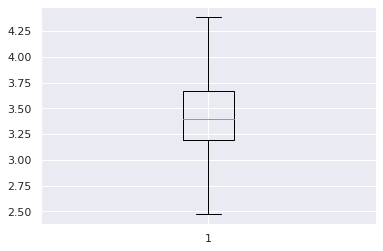

In [19]:
plt.boxplot(df['RGPA'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e72b986a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e72b68c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e72b98c88>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e72b68278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e72aac4a8>],
 'means': []}

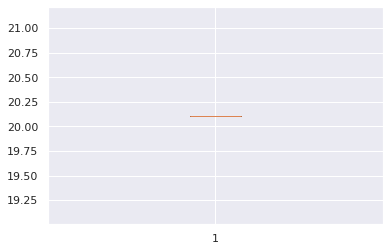

In [20]:
plt.boxplot(df['Class Percentile'])

Text(0.5, 1.0, 'Class Size')

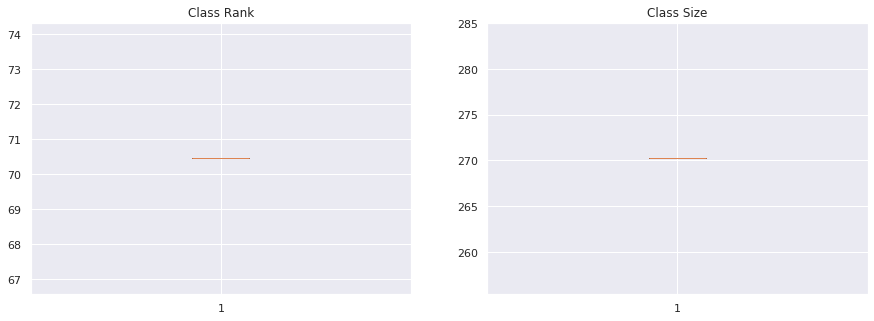

In [21]:
fig = plt.figure(figsize=(15,5))
plt.tight_layout()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(df['Class Rank'])
ax2.boxplot(df['Class Size'])

ax1.set_title('Class Rank')
ax2.set_title('Class Size')

Text(0.5, 1.0, 'SAT Total')

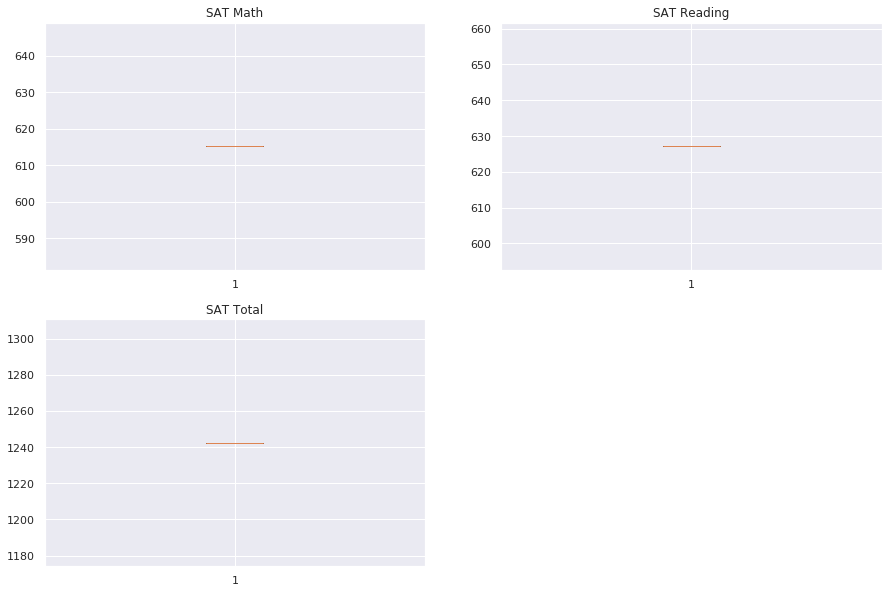

In [22]:
fig = plt.figure(figsize=(15,10))
plt.tight_layout()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.boxplot(df['SAT Math USE'])
ax2.boxplot(df['SAT Reading USE'])
ax3.boxplot(df['SAT Total USE'])

ax1.set_title('SAT Math')
ax2.set_title('SAT Reading')
ax3.set_title('SAT Total')

In [24]:
df.columns

Index(['ACT', 'SAT Math USE', 'SAT Reading USE', 'SAT Total USE', 'RGPA',
       'Class Rank', 'Class Size', 'Class Percentile'],
      dtype='object')

In [25]:
# import the preprocessing package from sklearn
from sklearn import preprocessing

# define column names
cols = ['ACT', 'SAT Math USE', 'SAT Reading USE', 'SAT Total USE', 'RGPA',
       'Class Rank', 'Class Size', 'Class Percentile']

# scale all columns to have a range of 0-1
x = df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=cols)
df_scaled.head()


,ACT,SAT Math USE,SAT Reading USE,SAT Total USE,RGPA,Class Rank,Class Size,Class Percentile
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.026042,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.481855,0.0,0.0,0.0
